# Importação e Limpeza dos Dados

README

Projeto focado em responder as seguintes questões:

 * How was the sales trend over the months?
 * What are the most frequently purchased products?
 * How many products does the customer purchase in each transaction?
 * What are the most profitable segment customers?
 * Based on your findings, what strategy could you recommend to the business to gain more profit?

Dados retirados de https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business?resource=download


Contexto: estou analisando uma empresa que iniciou no e-commerce

In [3]:
# Instalando Kaggle e suas propriedades
!pip install kagglehub[pandas-datasets]

In [4]:
# Importando Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Criando o DataFrame
try:
  df_ecommerce = pd.read_csv('Sales.csv')
  print('Arquivo carregado com sucesso')
except Exception as e:
  print('Arquivo não encontrado, verificar ficheiro!')
  type(e)

df_ecommerce.head()

Arquivo carregado com sucesso


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom


In [105]:
# Configurando Tabela
try:
  df_ecommerce['Month'] = df_ecommerce['Date'].dt.to_period('M')
  df_ecommerce['Revenue'] = df_ecommerce['Price'] * df_ecommerce['Quantity']
  df_ecommerce.rename(columns={'TransactionNo': 'ID_Transaction'}, inplace=True)
  df_ecommerce.rename(columns={'ProductNo': 'ID_Product'}, inplace=True)
  df_ecommerce.rename(columns={'CustomerNo': 'ID_Customer'}, inplace=True)
  df_ecommerce.rename(columns={'ProductName': 'Product_Name'}, inplace=True)
  df_ecommerce['Date'] = pd.to_datetime(df_ecommerce['Date'], format='%m/%d/%Y')
  print("Tipo de dado da coluna 'Date' após conversão:", df_ecommerce['Date'].dtype)
except Exception as e:
  print(f'Erro ao configurar a tabela. Erro encontrado -> {type(e)}: {e}')

df_ecommerce.head()

Tipo de dado da coluna 'Date' após conversão: datetime64[ns]


,ID_Transaction,Date,ID_Product,Product_Name,Price,Quantity,ID_Customer,Country,Month,Revenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,United Kingdom,2019-12,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,United Kingdom,2019-12,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,United Kingdom,2019-12,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,United Kingdom,2019-12,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,United Kingdom,2019-12,71.64


# Processamento e Análise de Dados

Foco em Responder as Perguntas

## **Question 1**

In [7]:
'''
  Question 1: How was the sales trend over the months? | Como foi a tendência de vendas ao longos dos meses?
  Interpretação da Questão: Análise de Receita Gerada ao longo dos meses de 2019 (temos o ano fiscal completo)
  Quais Dados irei utilizar para responder esta questão: Date, Price & Quantity

'''
#Primeiro Passo: Criar um DF com as datas de 2019, o preço e quantidade, criar uma coluna nova no DF de total vendido (preço * quantidade)
try:
  #filtrar anos para 2019 apenas
  filtro_2019 = df_ecommerce['Date'].dt.year == 2019;
  df_question1 = df_ecommerce.loc[filtro_2019 , ['Date','Price', 'Quantity']].copy()

  #Criar nova coluna de Receita
  df_question1['Revenue'] = df_question1['Price'] * df_question1['Quantity']


  min_year = df_question1['Date'].dt.year.min()
  if min_year < 2019:
    raise ValueError('Tem data errada')

except Exception as e:
  print(f'Erro ao criar o DF, Erro encontrado -> {type(e)} : {e}')


df_question1.head()

#Proximo Passo: Agrupar datas de 2019 em Mês e fazer a soma do Revenue por Mês


,Date,Price,Quantity,Revenue
0,2019-12-09,21.47,12.0,257.64
1,2019-12-09,10.65,36.0,383.40
2,2019-12-09,11.53,12.0,138.36
3,2019-12-09,10.65,12.0,127.80
4,2019-12-09,11.94,6.0,71.64


In [129]:
# Agrupar Por Mês e Cálculo de Revenue por Mês

'''
Primeiro: Converter a Coluna Date para o Início do Mês para garantir agrupamento | .dt.to_period('M').dt.to_timestamp() period formata para mês, ignorando dia
e o timestamp() volta a data para o formato ano-mes-dia
'''
df_question1['Month'] = df_question1['Date'].dt.to_period('M').dt.to_timestamp()

#Agrupar Revenue por Mês

df_question1_monthly = (
    df_question1.groupby('Month', as_index=False)['Revenue'].sum().sort_values('Month')
)

df_question1_monthly

,Month,Revenue
0,2019-01-01,3649506.42
1,2019-02-01,3299537.56
2,2019-03-01,4353308.78
3,2019-04-01,3416109.24
4,2019-05-01,4530850.36
5,2019-06-01,4410422.29
6,2019-07-01,4518347.92
7,2019-08-01,4614243.55
8,2019-09-01,6542706.30
9,2019-10-01,6971407.82


Visualização em Gráfico Para linha do Tempo

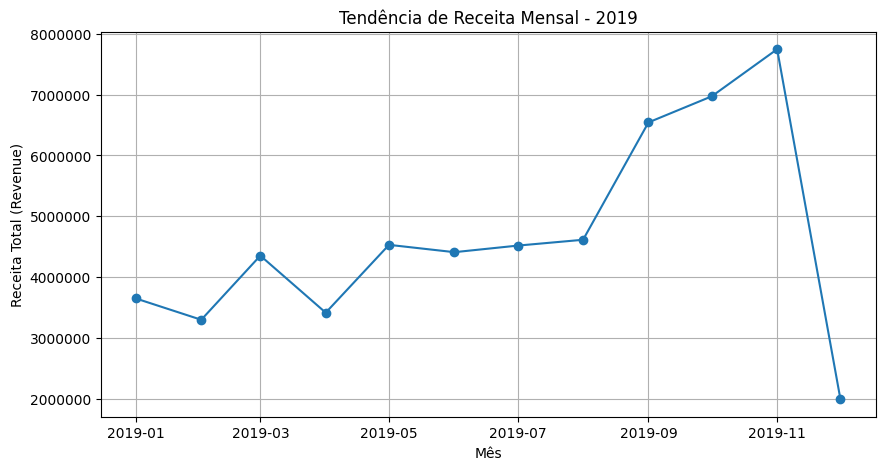

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_question1_monthly['Month'], df_question1_monthly['Revenue'], marker='o')
plt.title('Tendência de Receita Mensal - 2019')
plt.xlabel('Mês')
plt.ylabel('Receita Total (Revenue)')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## **Question 2**

In [132]:
'''
  Question 2: What are the most frequently purchased products? | Quais são so produtos mais comprados?
  Interpretação da Questão: Análise de Qual Produto é mais vendido dentro dessa linha temporal (the best of the month)
  Quais Dados irei utilizar para responder esta questão: Month, Product_Name, Quantity
'''

#Primeiro passo: Criar um DF para o TOP 1 Product de cada mês (Quantidade de vendas)
df_2019 = df_ecommerce.loc[filtro_2019, ['Date', 'Product_Name', 'Quantity']].copy()
df_2019['Month'] = df_2019['Date'].dt.to_period('M')

df_top_products = (
     df_2019.groupby(['Month', 'Product_Name'], as_index=False)['Quantity'].sum()
)

df_top_products = df_top_products.loc[
    df_top_products.groupby('Month')['Quantity'].idxmax()
].reset_index(drop=True)

df_top_products

,Month,Product_Name,Quantity
0,2019-01,Cream Hanging Heart T-Light Holder,5530.0
1,2019-02,Empire Design Rosette,3986.0
2,2019-03,Jumbo Bag Red Retrospot,5281.0
3,2019-04,World War 2 Gliders Asstd Designs,10143.0
4,2019-05,Popcorn Holder,6848.0
5,2019-06,Jumbo Bag Red Retrospot,3676.0
6,2019-07,Girls Alphabet Iron On Patches,5019.0
7,2019-08,Assorted Colour Bird Ornament,6552.0
8,2019-09,Jumbo Bag Red Retrospot,4267.0
9,2019-10,World War 2 Gliders Asstd Designs,8180.0


/tmp/ipython-input-1320858131.py:16: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


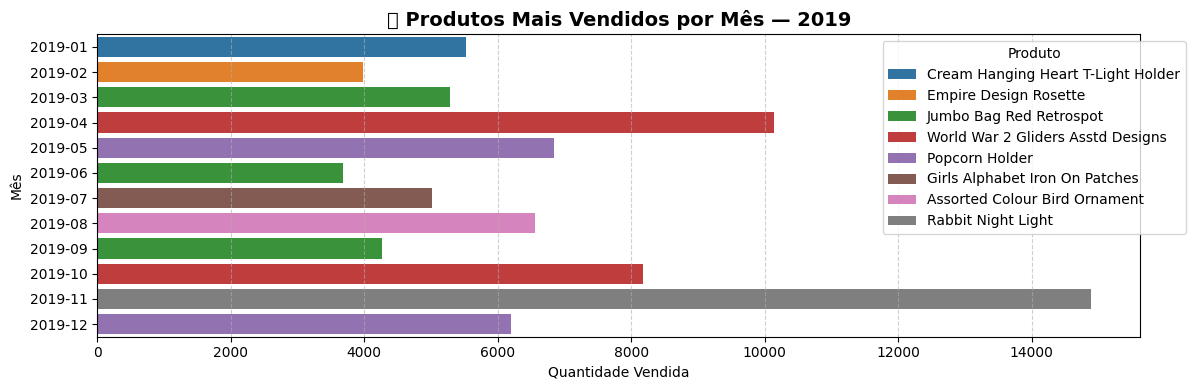

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.barplot(
    data=df_top_products,
    x='Quantity', y='Month', hue='Product_Name',
    palette='tab10'
)

plt.title('🏆 Produtos Mais Vendidos por Mês — 2019', fontsize=14, weight='bold')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Mês')
plt.legend(title='Produto', bbox_to_anchor=(1.05, 1))
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Question 3

In [94]:
'''
  Question 3: How many products does the customer purchase in each transaction?| Quantos Produtos são comprados por transação?
  Interpretação da Questão: Média Geral de quantos Produtos Comprados por Transação e Distribuição (quantas compras forem apenas 1, 2 ,3 itens etc)

'''

df_question3 = df_ecommerce.groupby('ID_Transaction')['Quantity'].sum()

df_question3.describe()



,Quantity
count,21486.000000
mean,232.841804
std,1194.750048
min,-80995.000000
25%,33.000000
50%,125.000000
75%,266.000000
max,80995.000000


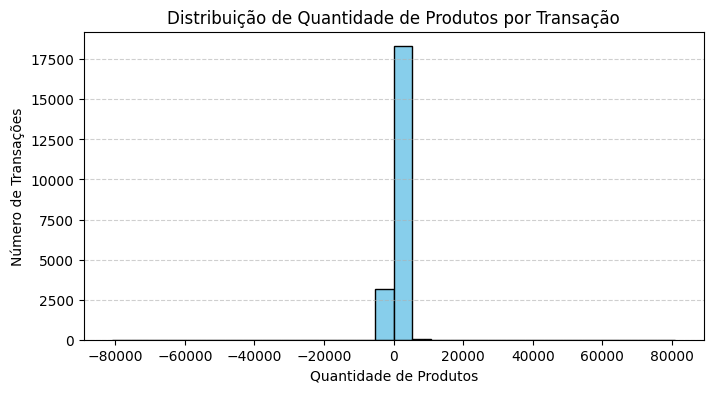

In [100]:
#Distribuição dos Dados encontrados
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df_question3.plot(kind='hist', bins=30, edgecolor='black', color='skyblue')
plt.title('Distribuição de Quantidade de Produtos por Transação')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Número de Transações')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Question 4


In [112]:
'''
 Question 4: What are the most profitable segment customers? | Quais são os segmentos de clientes mais lucrativos?
 Interpretação: Quais Países (segmento) geram mais Receita para o Ecommerce?
 Dados: Country & Revenue
'''

df_segmentos = df_ecommerce.groupby('Country', as_index=False)['Revenue'].sum()
df_segmentos = df_segmentos.sort_values('Revenue', ascending=False).reset_index(drop=True)

df_segmentos.head()

,Country,Revenue
0,United Kingdom,46561334.23
1,Netherlands,2146644.99
2,EIRE,1593247.47
3,Germany,1262212.47
4,France,1226306.97


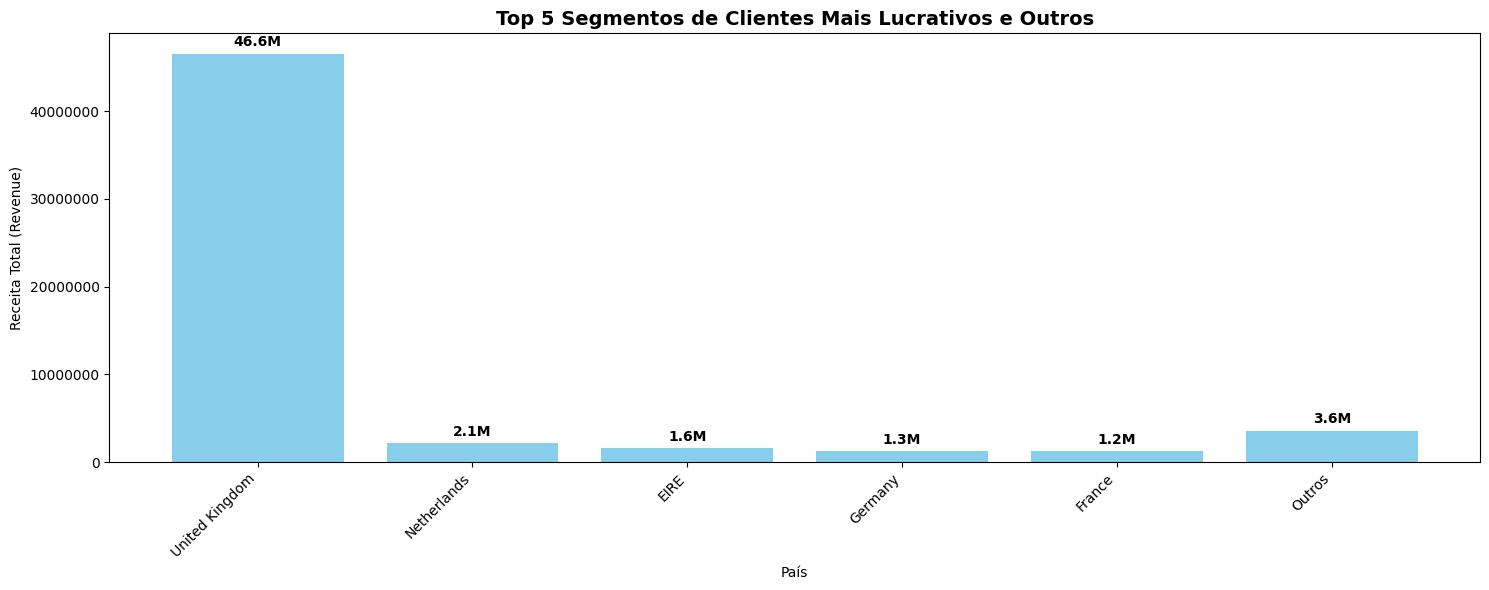

In [127]:
# 1. Criar um novo DF com os top 5
top_n = 5
df_top = df_segmentos.nlargest(top_n, 'Revenue')

# 2. Calcular a receita do restante e criar a linha 'Outros'
revenue_outros = df_segmentos['Revenue'].sum() - df_top['Revenue'].sum()
df_outros = pd.DataFrame([['Outros', revenue_outros]], columns=['Country', 'Revenue'])

# 3. Criar DF final
df_final = pd.concat([df_top, df_outros], ignore_index=True)

import matplotlib.pyplot as plt

# Layout do Gráfico
fig, ax = plt.subplots(figsize=(15, 6))

#Capturar o resultado da plotagem da barra para iterar sobre ele
rects = ax.bar(df_final['Country'], df_final['Revenue'], color='skyblue')

# ----------------------------------------------------------------------
# Adicionando Rótulos de Dados
# ----------------------------------------------------------------------

for rect in rects:
    # Obter a altura da barra (o valor de Revenue)
    height = rect.get_height()

    # Formatação mais limpa: em milhões (M)
    label = f'{height/1000000:.1f}M'

    # Usar ax.text() para posicionar o texto
    ax.text(
        rect.get_x() + rect.get_width() / 2., # Posição X: Centro da barra
        height + 500000, # Posição Y: Um pouco acima da barra
        label,
        ha='center', # Alinhamento horizontal: centralizado
        va='bottom',
        fontsize=10,
        fontweight='bold' # Para destacar os rótulos
    )

# ----------------------------------------------------------------------

# Formatação final do Eixo e Títulos
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Top 5 Segmentos de Clientes Mais Lucrativos e Outros', fontsize=14, fontweight='bold')
ax.set_xlabel('País')
ax.set_ylabel('Receita Total (Revenue)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Resultado Das Análises**

Utilizando o Período Fiscal de 2019, analisei os registros de vendas do ecommerce e notei 4 pontos:
- A tendência de Receita cresceu durante Jan - Outubro (112,24% aproximadamente)e de outubro para novembro despencou 74,26% aproximadamente de Receita, e em um mês de fortes compras, considerando perto do natal e o tipo de produtos ofertados, requer uma análise de eventos que ocorreram em novembro, tal como eventos, marketing, comercial para entender melhor este ponto.

- Ao Analisar dentro do ano, os produtos mais vendidos em quantidade, temos no top 5 no ano:
Wolrd War 2 com 18243 vendidos, Abril e Outubro Lider de Vendas
Rabbit Night Light com 14883 vendidos, Lider de Vendas em Novembro
Popcorn Holder com 6848 vendidos,
Assorted Colour Bird Ornament com 6552 vendidos

  Destaque para o Wolrd War 2 que em Abril e Outubro foi lider de vendas, o que nos mostra uma dominância maior neste tipo de produto mas não é o que mais gera Receita por venda.

- Em média, por transação temos 232 unidades compradas, e um desvio padrão de 1194 (quase 5x a média de 232), isso nos mostra que alguns clientes estão comprando muitas quantidades acima da média (que é o caso dos clientes em United Kingdom), e os demais (em outros segmentos) estão comprando abaixo da média, o que nos mantém com a maior receita focada em um único país, sem diversificação de rendas em outros segmentos

- Comprovando o nível do desvio, temos o gráfico sobre os segmentos de clientes que mais geram receitas, onde percebemos que o país United Kingdom tem uma descrepância de vendas altas, em relação aos outros, isso nos mostra que devemos focar em outros países para aumento da diversificação de renda e alcance global maior.


